<a href="https://colab.research.google.com/github/CST501-IIITKota/lab-repo-2025kpad1005-alt/blob/main/2025kpad1005_ds_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.head()

,Numerical_1,Numerical_2,Numerical_3,Category_1,Category_2,Boolean_Col
0,50.0,0.124001,183.0,C,X,False
1,NaN,0.352440,139.0,NaN,Y,False
2,46.0,0.386030,84.0,A,Z,<NA>
3,49.0,0.700371,103.0,B,NaN,False
4,NaN,0.360425,68.0,NaN,Y,False


In [12]:
data=df.copy()

In [13]:
data.head()

,Numerical_1,Numerical_2,Numerical_3,Category_1,Category_2,Boolean_Col
0,50.0,0.124001,183.0,C,X,False
1,NaN,0.352440,139.0,NaN,Y,False
2,46.0,0.386030,84.0,A,Z,<NA>
3,49.0,0.700371,103.0,B,NaN,False
4,NaN,0.360425,68.0,NaN,Y,False


In [14]:
data.shape

(150, 6)

In [16]:
data.size

900

In [17]:
data.tail()

,Numerical_1,Numerical_2,Numerical_3,Category_1,Category_2,Boolean_Col
145,15.0,0.072110,157.0,C,NaN,False
146,27.0,0.187369,141.0,A,Z,True
147,NaN,NaN,119.0,A,Z,True
148,54.0,NaN,123.0,A,X,False
149,68.0,0.017842,70.0,C,X,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Numerical_1  128 non-null    float64
 1   Numerical_2  115 non-null    float64
 2   Numerical_3  123 non-null    float64
 3   Category_1   128 non-null    object 
 4   Category_2   122 non-null    object 
 5   Boolean_Col  122 non-null    boolean
dtypes: boolean(1), float64(3), object(2)
memory usage: 6.3+ KB


In [19]:
data.describe()

,Numerical_1,Numerical_2,Numerical_3
count,128.000000,115.000000,123.000000
mean,66.156250,0.611293,130.983740
std,88.334051,1.437783,41.683622
min,10.000000,-7.102271,51.000000
25%,35.750000,0.264832,95.500000
50%,56.500000,0.538333,136.000000
75%,79.000000,0.802242,167.500000
max,796.000000,9.954297,199.000000


In [30]:
data.isnull().sum()

,0
Numerical_1,0
Numerical_2,0
Numerical_3,0
Category_1,0
Category_2,0
Boolen_Col,0


In [21]:
data['Numerical_1']=data['Numerical_1'].fillna(data['Numerical_1'].mean())
data['Numerical_2']=data['Numerical_2'].fillna(data['Numerical_2'].mean())
data['Numerical_3']=data['Numerical_3'].fillna(data['Numerical_3'].mean())

In [26]:
data['Category_1']=data['Category_1'].fillna(data['Category_1'].mode()[0])
data['Category_2']=data['Category_2'].fillna(data['Category_2'].mode()[0])
data['Boolean_Col']=data['Boolean_Col'].fillna(data['Boolean_Col'].mode()[0])

In [29]:
#remove Boolen_Col
data.drop('Boolean_Col',axis=1,inplace=True)

In [38]:
Q1_1 = data['Numerical_1'].quantile(0.25)
Q3_1 = data['Numerical_1'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1
lower_bound_1 = Q1_1 - 1.5 * IQR_1
outlier_indices_1 = data[(data['Numerical_1'] < lower_bound_1) | (data['Numerical_1'] > upper_bound_1)].index
print(Q1_1)
print(Q3_1)
print(IQR_1)
print(upper_bound_1)
print(lower_bound_1)
print(outlier_indices_1)

39.0
76.0
37.0
131.5
-16.5
Index([16, 97], dtype='int64')


In [39]:
Q1_2 = data['Numerical_2'].quantile(0.25)
Q3_2 = data['Numerical_2'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2
lower_bound_2 = Q1_2 - 1.5 * IQR_2
outlier_indices_2 = data[(data['Numerical_2'] < lower_bound_2) | (data['Numerical_2'] > upper_bound_2)].index

print(Q1_2)
print(Q3_2)
print(IQR_2)
print(upper_bound_2)
print(lower_bound_2)
print(outlier_indices_2)

0.3786962767823093
0.7250609299844794
0.34636465320217
1.2446079097877343
-0.1408507030209457
Index([57, 79, 126], dtype='int64')


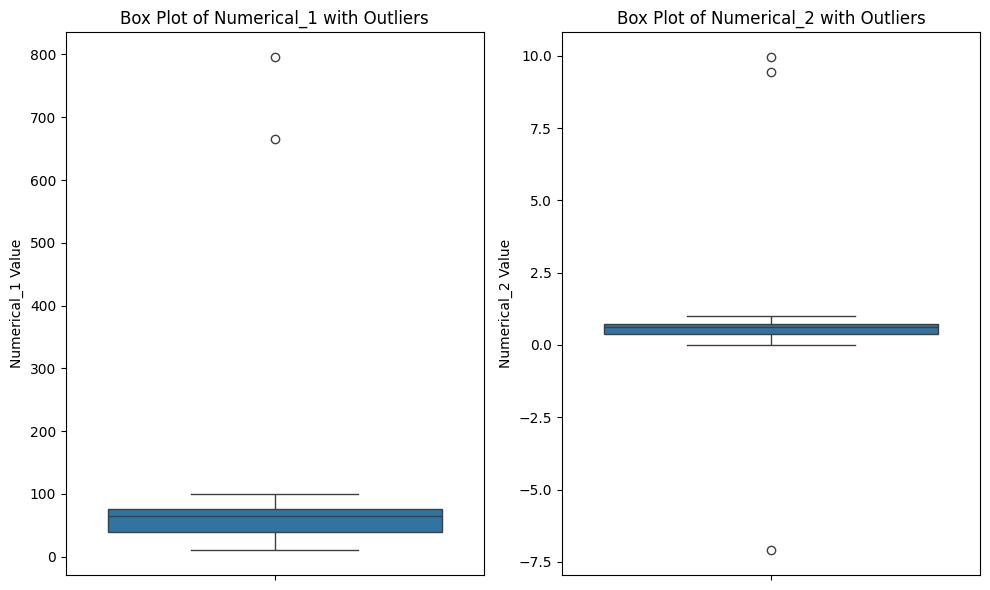

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(y=data['Numerical_1'], ax=axes[0])
axes[0].set_title('Box Plot of Numerical_1 with Outliers')
axes[0].set_ylabel('Numerical_1 Value')

sns.boxplot(y=data['Numerical_2'], ax=axes[1])
axes[1].set_title('Box Plot of Numerical_2 with Outliers')
axes[1].set_ylabel('Numerical_2 Value')

plt.tight_layout()
plt.show()

In [40]:
numerical_cols = ['Numerical_1', 'Numerical_2', 'Numerical_3']
correlation_matrix = data[numerical_cols].corr()
print(correlation_matrix)

             Numerical_1  Numerical_2  Numerical_3
Numerical_1     1.000000    -0.041519    -0.005766
Numerical_2    -0.041519     1.000000    -0.164316
Numerical_3    -0.005766    -0.164316     1.000000


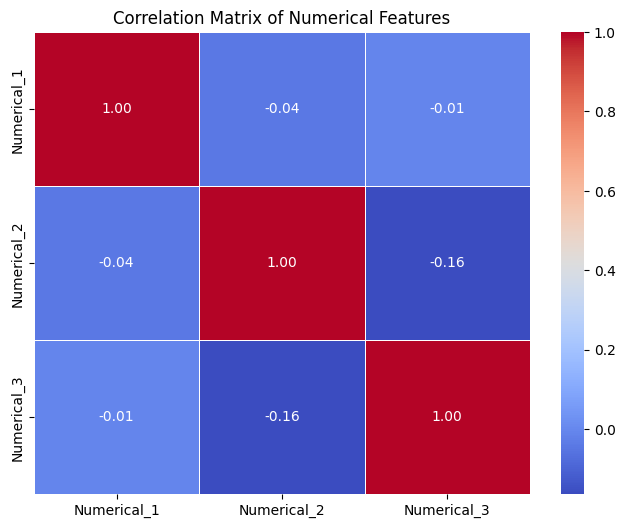

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [47]:

print(data.iloc[0:5, :])

   Numerical_1  Numerical_2  Numerical_3 Category_1 Category_2  Boolen_Col  \
0     50.00000     0.124001        183.0          C          X       False   
1     66.15625     0.352440        139.0          B          Y       False   
2     46.00000     0.386030         84.0          A          Z       False   
3     49.00000     0.700371        103.0          B          Y       False   
4     66.15625     0.360425         68.0          B          Y       False   

   Numerical_Combined  
0           50.124001  
1           66.508690  
2           46.386030  
3           49.700371  
4           66.516675  


In [48]:

print(data.loc[data['Category_1'] == 'A', ['Numerical_1', 'Numerical_2']])

     Numerical_1  Numerical_2
2       46.00000     0.386030
11      12.00000     0.054388
20      53.00000     0.283183
34      14.00000     0.088029
45      36.00000     0.611293
47      28.00000     0.406094
50      71.00000     0.069226
56      89.00000     0.480890
60      66.15625     0.934965
70      54.00000     0.611293
82      65.00000     0.740401
85      27.00000     0.376252
92      96.00000     0.091506
94      94.00000     0.924406
96      12.00000     0.880087
98      82.00000     0.452663
108     14.00000     0.611293
110     12.00000     0.523734
115     92.00000     0.861095
122     25.00000     0.785646
125     20.00000     0.611293
128     66.15625     0.822481
132     66.15625     0.611293
134     47.00000     0.918557
141     66.15625     0.948250
146     27.00000     0.187369
147     66.15625     0.611293
148     54.00000     0.611293


In [50]:
data['Numerical_Combined'] = data['Numerical_1'] + data['Numerical_2']
print(data[['Numerical_1', 'Numerical_2', 'Numerical_Combined']].head())

   Numerical_1  Numerical_2  Numerical_Combined
0     50.00000     0.124001           50.124001
1     66.15625     0.352440           66.508690
2     46.00000     0.386030           46.386030
3     49.00000     0.700371           49.700371
4     66.15625     0.360425           66.516675


In [49]:
grouped_stats = data.groupby('Category_1')[['Numerical_1', 'Numerical_2']].agg(['mean', 'median'])
print(grouped_stats)

           Numerical_1           Numerical_2          
                  mean    median        mean    median
Category_1                                            
A            50.027902  53.50000    0.553368  0.611293
B            68.777478  66.15625    0.567362  0.611293
C            78.018939  57.00000    0.532944  0.611293
D            63.191532  66.15625    0.829210  0.592398


In [66]:
des_df = pd.DataFrame({
    'Category_1': ['A', 'B', 'C', 'D'],
    'Description': ['Category A des', 'Category B des', 'Category C des', 'Category D des']
})

merged_data = data.merge(des_df, on='Category_1', how='left')

print(merged_data.head())

   Numerical_1  Numerical_2  Numerical_3 Category_1 Category_2  Boolen_Col  \
0     50.00000     0.124001        183.0          C          X       False   
1     66.15625     0.352440        139.0          B          Y       False   
2     46.00000     0.386030         84.0          A          Z       False   
3     49.00000     0.700371        103.0          B          Y       False   
4     66.15625     0.360425         68.0          B          Y       False   

   Numerical_Combined     Description  
0           50.124001  Category C des  
1           66.508690  Category B des  
2           46.386030  Category A des  
3           49.700371  Category B des  
4           66.516675  Category B des  


In [55]:
numerical_cols = ['Numerical_1', 'Numerical_2', 'Numerical_3']

for col in numerical_cols:
    mode_values = data[col].mode()
    print(f"  Mode: {mode_values.tolist()}")
    print(f"  Variance: {data[col].var():.4f}")
    print(f"  Standard Deviation: {data[col].std():.4f}")
    print(f"  Range: {data[col].max() - data[col].min():.4f}")
    print("-----------------------------------------------------------")

  Mode: [66.15625]
  Variance: 6650.7978
  Standard Deviation: 81.5524
  Range: 786.0000
-----------------------------------------------------------
  Mode: [0.6112929104796652]
  Variance: 1.5816
  Standard Deviation: 1.2576
  Range: 17.0566
-----------------------------------------------------------
  Mode: [130.98373983739836]
  Variance: 1422.6709
  Standard Deviation: 37.7183
  Range: 148.0000
-----------------------------------------------------------


In [68]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(data['Numerical_1'], data['Numerical_2'])

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 9.8423
P-value: 0.0000


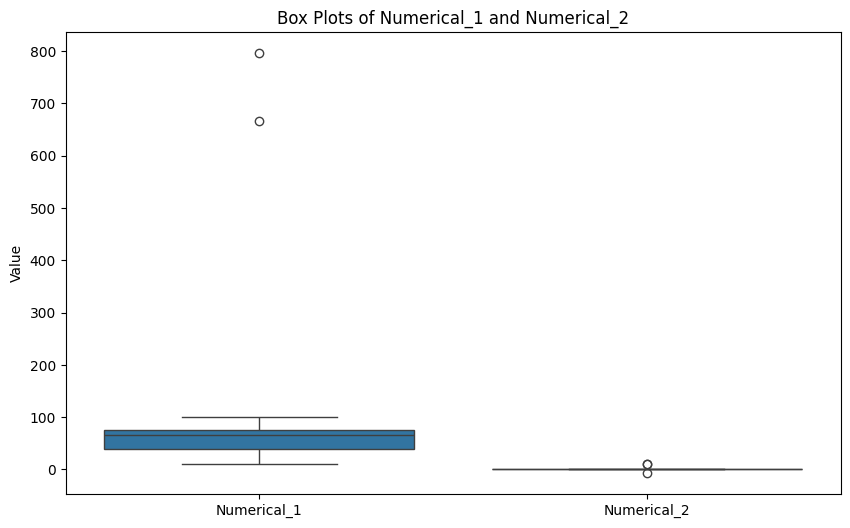

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Numerical_1', 'Numerical_2']])
plt.title('Box Plots of Numerical_1 and Numerical_2')
plt.ylabel('Value')
plt.show()

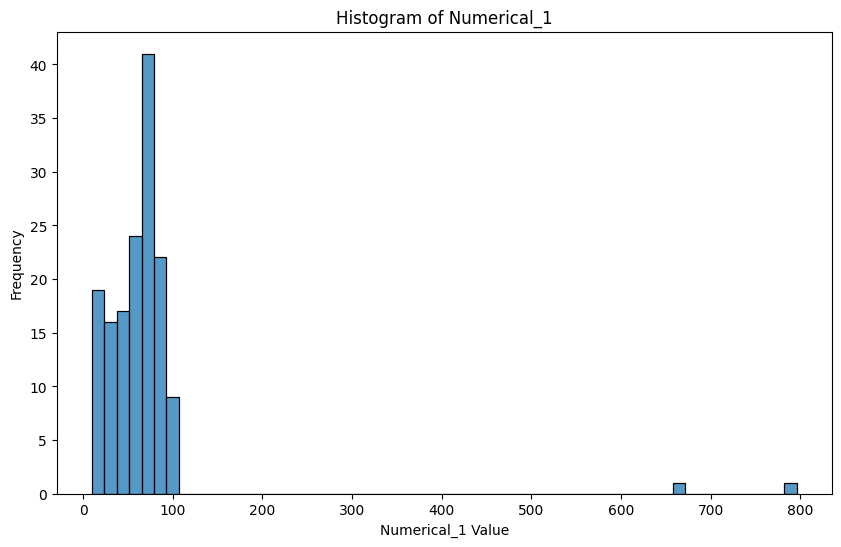

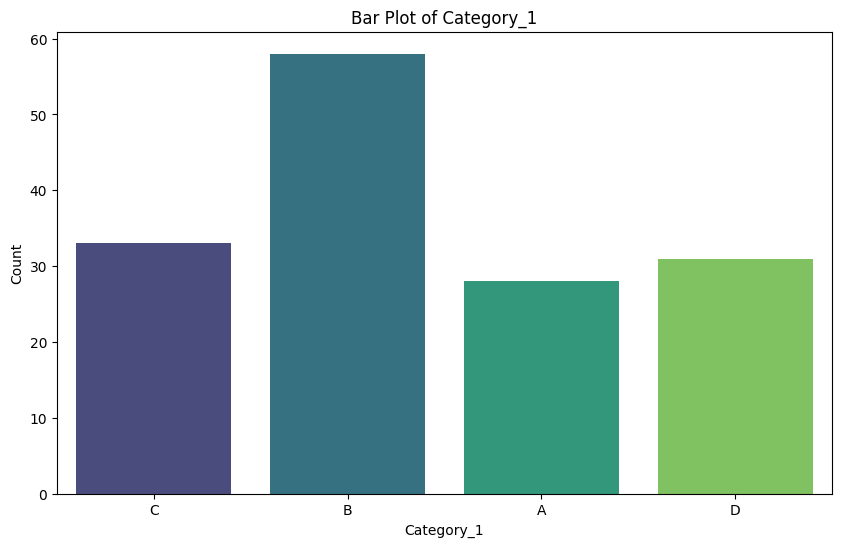

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data['Numerical_1'].dropna())
plt.title('Histogram of Numerical_1')
plt.xlabel('Numerical_1 Value')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Category_1', data=data, palette='viridis', hue='Category_1', legend=False)
plt.title('Bar Plot of Category_1')
plt.xlabel('Category_1')
plt.ylabel('Count')
plt.show()